# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

### Respuesta
Los datos que creo son:
* La zona, o geolocalización
* La tipología
* El estado de la casa
* El tamaño
* Antiguedad de la casa
* Cantidad de metros cuadrados del terreno y cantidad de metros cubiertos
* Si tiene patio o no
* Cantidad de cuartos
* Cantidad de baños

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
data=pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
print("¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?")
print("Tiene: ", data.shape)
(data.head(5))

¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
Tiene:  (146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [3]:
print("¿Cuántos valores faltantes hay en cada columna?")
data.isna().sum()

¿Cuántos valores faltantes hay en cada columna?


start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

Tipos de propiedad: 10
['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']


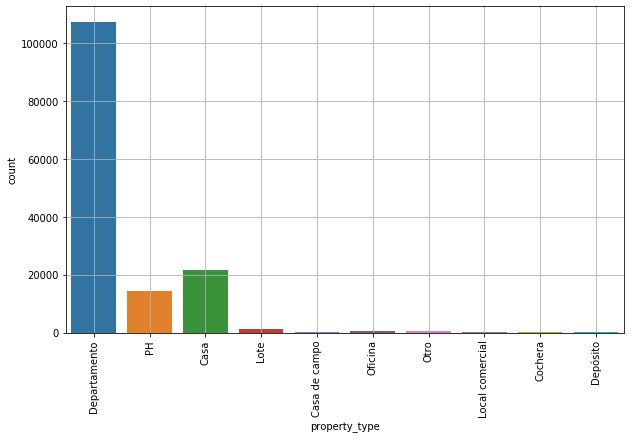

In [4]:
#Cuantos tipos de propiedad hay en este dataset?
tipologia=data["property_type"]

print("Tipos de propiedad:", len(tipologia.unique()))
print(tipologia.unique())
plt.figure(figsize=(10,6))
#tipologia.hist()
plt.xticks(rotation=90)
depa=data["property_type"].value_counts()
depa
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x="property_type", data=data)
plt.grid()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [5]:
region=data["l2"]
barrio=data["l3"]
barrio.head()

0    San Cristobal
1            Boedo
2          Palermo
3          Palermo
4         La Plata
Name: l3, dtype: object

C:\Users\Alfredo\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]),
 <a list of 89 Text xticklabel objects>)

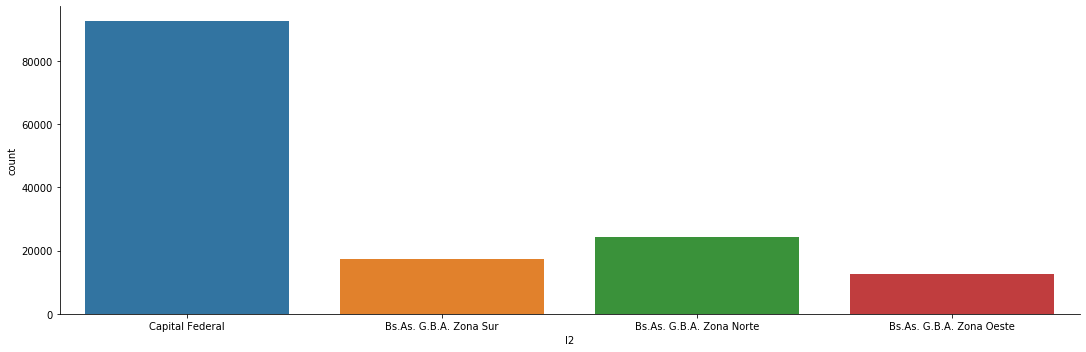

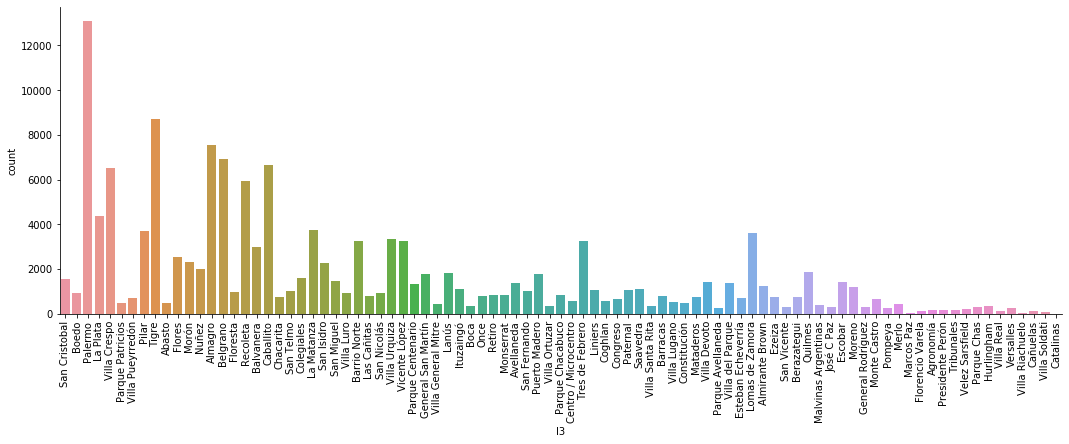

In [6]:
x1=sns.factorplot('l2',data=data,kind="count", aspect=3)
x2=sns.factorplot('l3',data=data,kind="count", aspect=3)
plt.xticks(rotation=90)

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [7]:
#propmas = data.sort_values('surface_total',ascending="False")
depa=data["property_type"].value_counts()
#data[(data['rnd_2'] == 2) & (data['rnd_3'] > 15)]
depa=depa.to_frame()
#Total = depa['property_type'].sum()
#print(Total)
depa

,property_type
Departamento,107326
Casa,21521
PH,14298
Lote,1312
Oficina,658
Otro,374
Local comercial,325
Casa de campo,322
Depósito,265
Cochera,259


In [8]:
region=data["l2"].value_counts()
region=region.to_frame()
region
#Total1 = region['l2'].sum()
#Total1

,l2
Capital Federal,92539
Bs.As. G.B.A. Zona Norte,24282
Bs.As. G.B.A. Zona Sur,17173
Bs.As. G.B.A. Zona Oeste,12666


In [9]:
barrio=data["l3"].value_counts()
barrio=barrio.to_frame()
barrio

,l3
Palermo,13073
Tigre,8718
Almagro,7527
Belgrano,6935
Caballito,6650
...,...
Cañuelas,108
Villa Soldati,69
Villa Riachuelo,42
Marcos Paz,35


In [10]:
ver=data[["l2","l3"]]
ver

,l2,l3
0,Capital Federal,San Cristobal
1,Capital Federal,Boedo
2,Capital Federal,Palermo
3,Capital Federal,Palermo
4,Bs.As. G.B.A. Zona Sur,La Plata
...,...,...
146655,Bs.As. G.B.A. Zona Sur,Berazategui
146656,Bs.As. G.B.A. Zona Norte,Pilar
146657,Bs.As. G.B.A. Zona Norte,Pilar
146658,Bs.As. G.B.A. Zona Norte,Pilar


* Checkpoint

In [11]:
data3y4 = (data.l2 == 'Capital Federal')&(data.property_type =='Casa')|(data.l2 == 'Capital Federal')&(data.property_type =='Departamento')| (data.l2 == 'Capital Federal')&(data.property_type =='PH')           
data = data[data3y4] 
data.shape    

(91485, 19)

In [12]:
filtrar=(data.l2=="Capital Federal")&(data.property_type=="Casa")|(data.l2=="Capital Federal")&(data.property_type=="Departamento")
filtrar.value_counts()

True     81721
False     9764
dtype: int64

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

A)
* Viendo el gráfico general parece que los valores de "price", "surface_covered" y "surface_total", no tienen mucho sentido.
Obviamente habrá que hacerle algún tratamiento a dichas columnas, para que nos muestren un valor real.

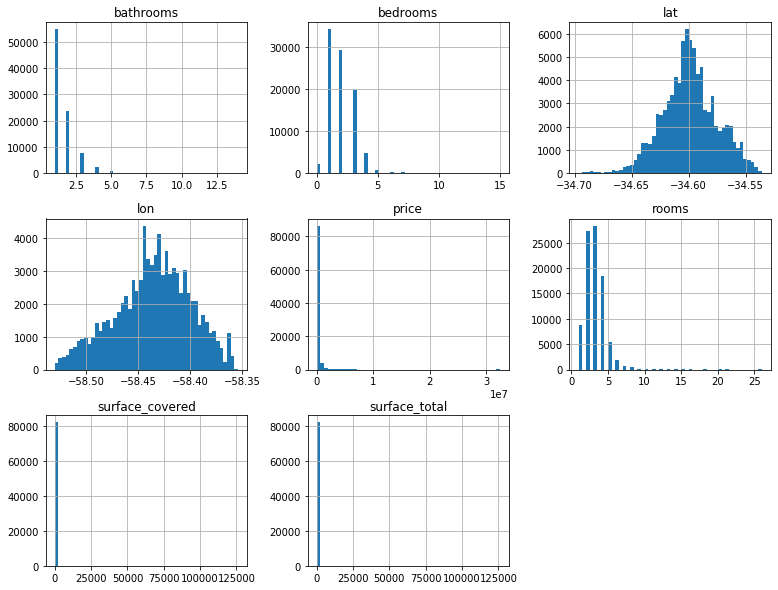

In [13]:
# COMPLETAR - AGREGAR TANTAS CELDAS%matplotlib inline
data.hist(bins=50,figsize=(25,10))
data.lat.hist(bins=40,figsize=(13,10),label=" ")
plt.legend()
plt.show()

In [14]:
data["surface_covered"].value_counts().to_frame()
data["surface_total"].value_counts().to_frame()

,surface_total
50.0,1843
42.0,1670
45.0,1488
70.0,1486
40.0,1445
...,...
555.0,1
3237.0,1
4424.0,1
4421.0,1


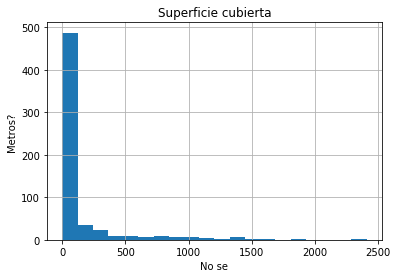

In [15]:
plt.hist(data["surface_covered"].value_counts(),bins=20,label="Surface_covered")
plt.title("Superficie cubierta")
plt.xlabel("No se")
plt.ylabel("Metros?",rotation=90)
plt.grid()

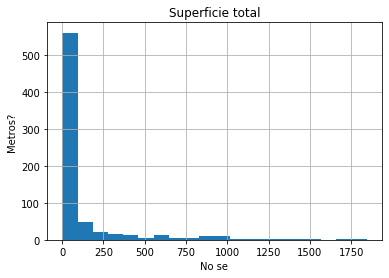

In [16]:
plt.hist(data["surface_total"].value_counts(),bins=20,label="Surface_total")
plt.title("Superficie total")
plt.xlabel("No se")
plt.ylabel("Metros?",rotation=90)
plt.grid()

* Claramente se ve en los gráficos la dispersión que hay en la superficie cubierta. 
Probablemente esos valores están mal cargados, o hubo una mala interpretación de los usuarios a la hora de poner la unidad de medida, lo que hace que haya un errores en los datos.

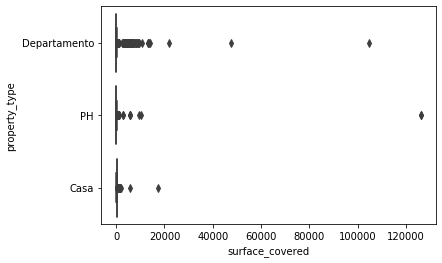

In [17]:
sns.boxplot(data = data, x = "surface_covered",y="property_type")

* Inciso B y C:

Inciso B y C
(91433, 19)
Ahora el gráfico de barras muestra el diagrama de cajas un poco más reducido


C:\Users\Alfredo\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


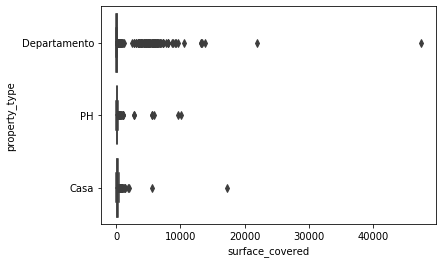

In [18]:
print("Inciso B y C")
data.drop(data[data.surface_covered==1].index,inplace=True)
data.drop(data[data.surface_total>100000].index,inplace=True)
print(data.shape)
print("Ahora el gráfico de barras muestra el diagrama de cajas un poco más reducido")
sns.boxplot(data = data, x = "surface_covered",y="property_type")

* Acá creo otro data frame (esto no es del todo necesario), para no seguir modificando al original (data). Me di cuenta que todavía había valores faltantes en las columnas de superficie total y superficie cubierta. Entonces, reemplacé los valores NaN por cero y luego, borré las columnas que contenían superficie cubierta = 0 y superficie total = 0
* De todos modos se sigue viendo en la gráfica que hay outliers todavía.
* Tengo que tratar de sacarlos usando el rango intercuartil.


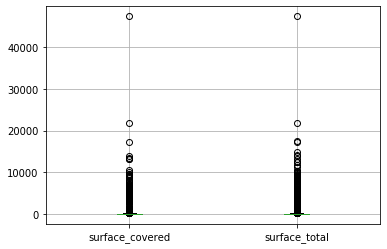

In [19]:
d1= data.sort_values("surface_covered",ascending=True)
d1["surface_covered"].fillna(0,inplace=True)
d1["surface_total"].fillna(0,inplace=True)
d1.drop(d1[d1.surface_covered==0].index,inplace=True)
d1.drop(d1[d1.surface_total==0].index,inplace=True)
#d1.shape
boxplot = d1.boxplot(column=['surface_covered', 'surface_total'])
boxplot


Inciso D
* Acá borro las celdas en las que la superficie total es menor que la superficie cubierta.
* Por una cuestión de sentido común, la superficie cubierta, no puede ser mayor que la superficie total.

In [20]:
data_nuevo = (data.price < 450000 )&(data.property_type =='Departamento')|(data.price < 470000)&(data.property_type=='PH')| (data.price < 720000)&(data.property_type =='Casa')           
data= data[data_nuevo] 
data.shape

(82351, 19)

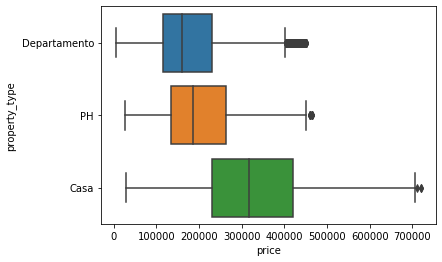

In [21]:
sns.boxplot(data=data,x="price",y="property_type")

* Me fijo en que estado está la distribución de los precios

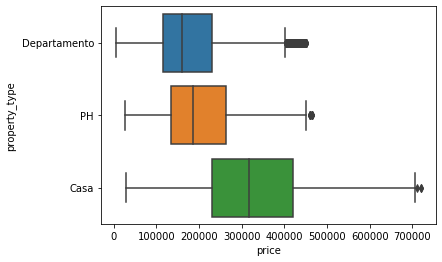

In [22]:
precio= data.sort_values("price",ascending=False)
precio["price"].to_frame()
data.drop(data[data.price>31434232.0].index,inplace=True)
sns.boxplot(data=data,x="price",y="property_type")

* Ahora me voy a fijar si hay precios muy bajos...

In [23]:
data.drop(data[data.price<5000].index,inplace=True)
data.shape

(82351, 19)

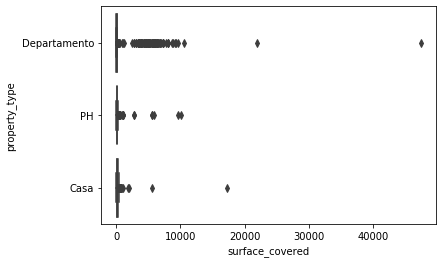

In [24]:
sns.boxplot(data = data, x = "surface_covered",y="property_type")

* Claramente se ve en el diagrama de cajas de los departamentos, que hay un valor muy fuera. 
Probablemente el usuario no quiso poner el precio de su propiedad. Y puso un valor random muy elevado.
Por lo tanto hay que sacar a ese valor del análisis.

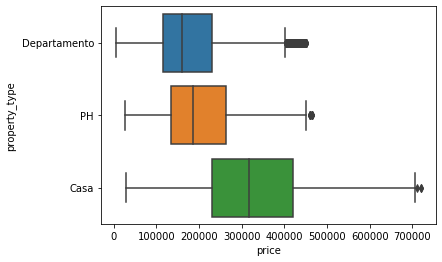

In [25]:
sns.boxplot(data = data, x = "price",y="property_type")

* Esto nos dice que hay 10194 propiedades que la superficie cubierta es mayor a la superficie total.
Osea que esto es un error, porque es imposible.

In [26]:
suptot=data.surface_covered<=data.surface_total
suptot.to_frame()
print("Valores de superficie cubierta mayor a total:\n",suptot.value_counts())
suptot1=data.surface_total>1
print("Valores de superficie total menor a 1:",suptot1.value_counts())
suptot=suptot.to_frame()
suptot

Valores de superficie cubierta mayor a total:
 True     72840
False     9511
dtype: int64
Valores de superficie total menor a 1: True     74043
False     8308
Name: surface_total, dtype: int64


,0
0,True
1,True
2,True
3,True
5,True
...,...
146545,True
146546,True
146549,True
146550,True


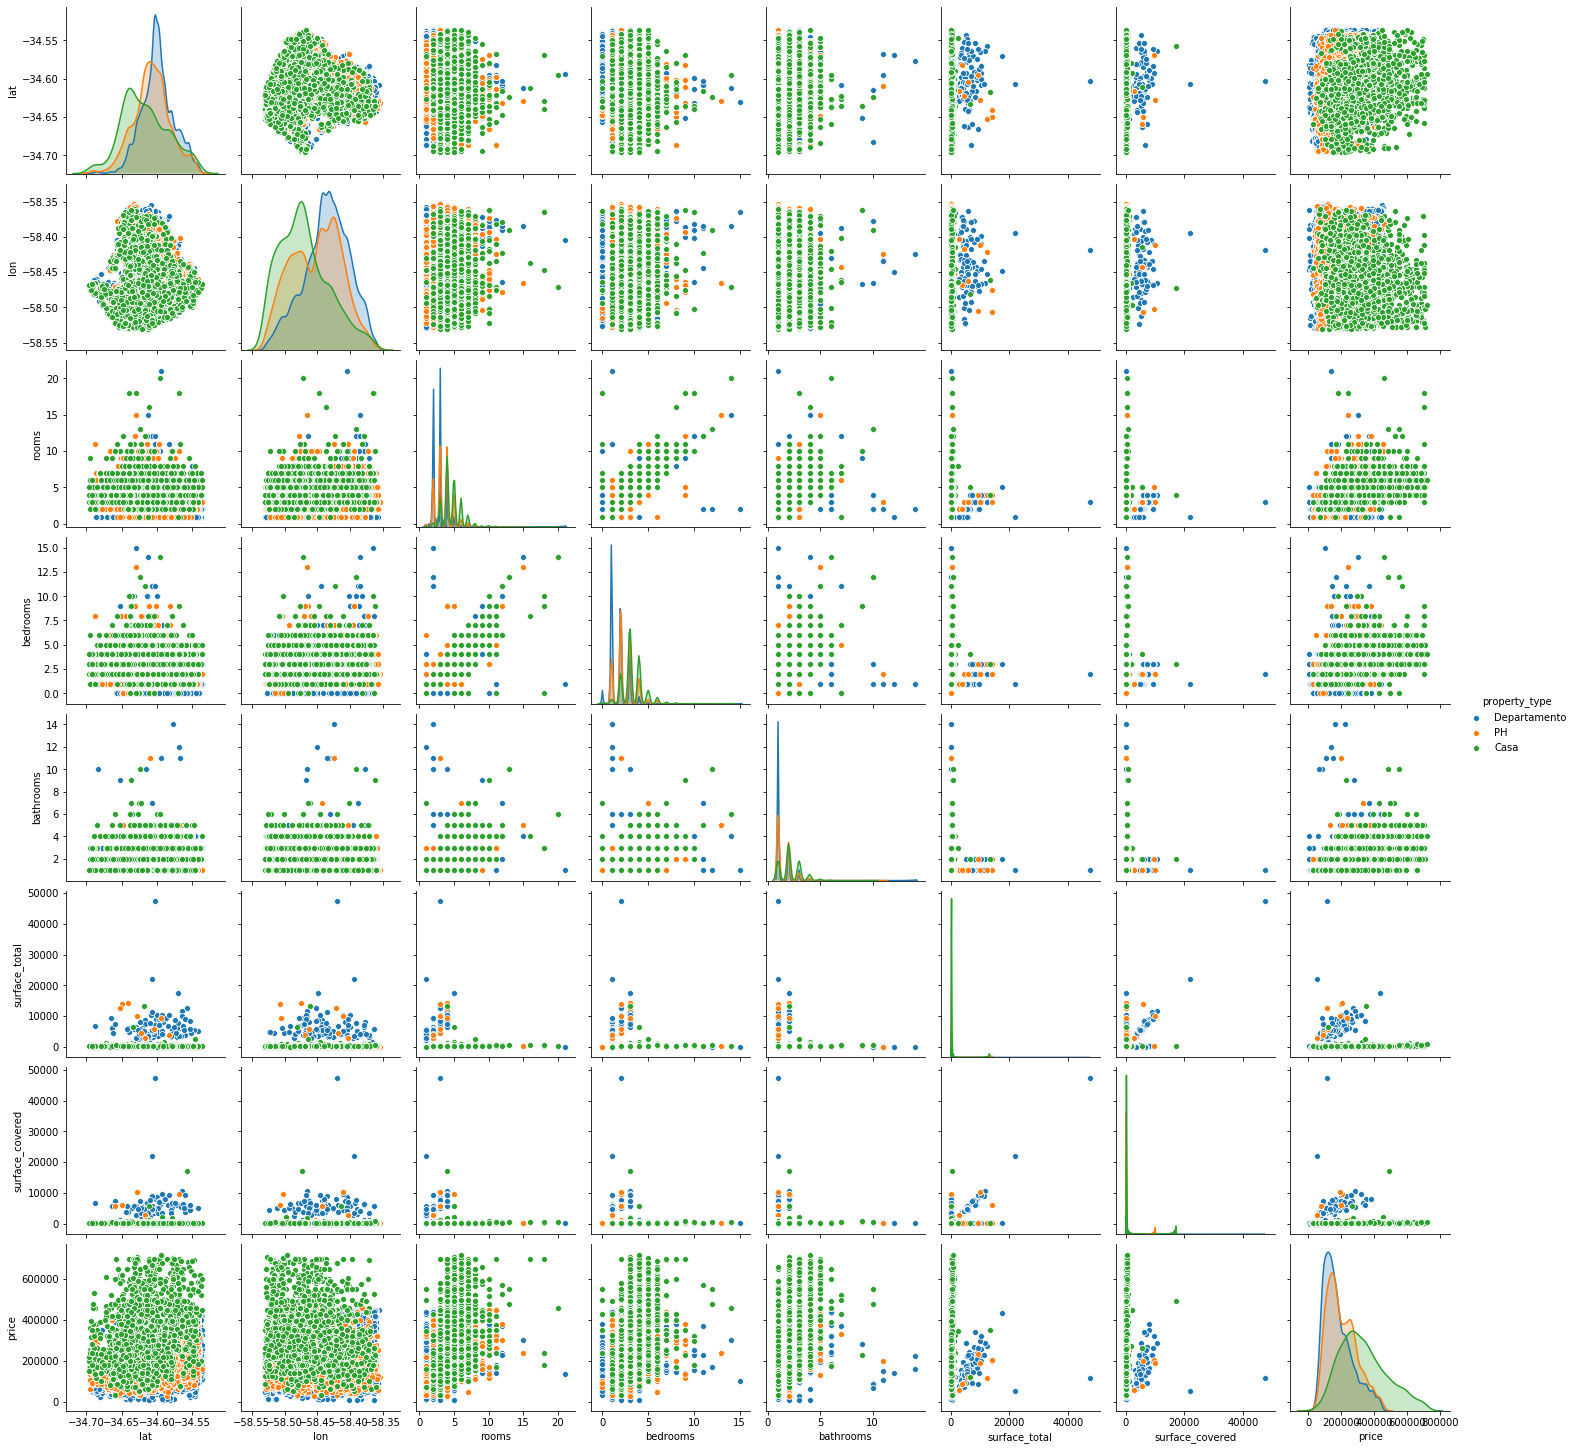

In [27]:
sns.pairplot(data,hue="property_type")

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [28]:
data_nuevo = (data.price < 450000 )&(data.property_type =='Departamento')|(data.price < 470000)&(data.property_type=='PH')| (data.price < 720000)&(data.property_type =='Casa')           

In [29]:
data_nuevo=data["rooms"]
data_nuevo1=data["bedrooms"]
data_nuevo=pd.concat([data_nuevo,data_nuevo1],axis=1)
data_nuevo2=data["bathrooms"]
data_nuevo=pd.concat([data_nuevo,data_nuevo2],axis=1)
data_nuevo3=data["surface_total"]
data_nuevo=pd.concat([data_nuevo,data_nuevo3],axis=1)
data_nuevo4=data["surface_covered"]
data_nuevo=pd.concat([data_nuevo,data_nuevo4],axis=1)
data_nuevo5=data["price"]
data_nuevo=pd.concat([data_nuevo,data_nuevo5],axis=1)
data_nuevo6=data.property_type=="Departamento"
data_nuevo7=data["l3"]
depa=pd.DataFrame(data_nuevo,columns=['rooms','bedrooms', 'bathrooms', 'surface_total', 'surface_covered','price'])
depa= data_nuevo.loc[(data.property_type == 'Departamento')]
casa= data_nuevo.loc[(data.property_type=="Casa")]
ph= data_nuevo.loc[(data.property_type=="PH")]
datacasas=pd.concat([data_nuevo,data_nuevo7],axis=1)
casaxbarrio=pd.DataFrame(datacasas,columns=['rooms','bedrooms', 'bathrooms', 'surface_total', 'surface_covered','price',"l3"])
casaxbarrio

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3
0,7.0,7.0,2.0,140.0,140.0,153000.0,San Cristobal
1,2.0,1.0,2.0,70.0,58.0,159000.0,Boedo
2,2.0,1.0,1.0,45.0,45.0,125000.0,Palermo
3,2.0,1.0,1.0,85.0,50.0,295000.0,Palermo
5,2.0,1.0,1.0,56.0,56.0,150000.0,Villa Crespo
...,...,...,...,...,...,...,...
146545,3.0,2.0,2.0,88.0,82.0,399000.0,Palermo
146546,3.0,2.0,2.0,89.0,82.0,434999.0,Palermo
146549,3.0,2.0,1.0,84.0,84.0,178000.0,Palermo
146550,5.0,2.0,2.0,114.0,95.0,298000.0,Palermo


* Vemos en el mapa de calor las correlaciones de las variables, respecto una de otra. Y se puede observar que;
* A medida de que hay más cuartos el precio aumenta
* A medida de que hay más baños el precio aumenta
* Y la coorrelación entre baños y cuartos es bastante significativa, por lo que puede suponerse antes de ir a ver un departamento, es que, si sabemos que tiene x cantidad de cuartos, muy probablemente haya baños en esos cuartos, lo que indica que el precio va a ser mayor.
* Este es un dato que yo no esperaba... la superficie cubierta y la superficie total, no determinan en gran medida el valor de un departamento.

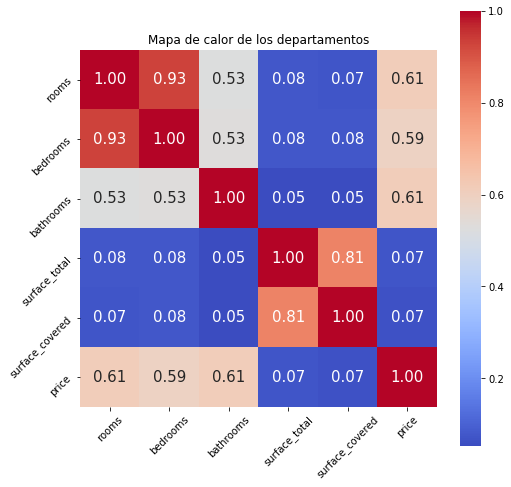

In [30]:
depaCORR=depa.corr()

def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
depa.corr(method=histogram_intersection)
plt.figure(figsize=(8,8))
sns.heatmap(depaCORR, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title("Mapa de calor de los departamentos")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

* Vemos en el mapa de calor las correlaciones de las variables, respecto una de otra. Y se puede
 observar que;
* A diferencia de los departamentos, si bien a medida de que hay más cuartos el precio aumenta, no es lo más determinante.
* También vemos que a medida de que hay más baños el precio aumenta.

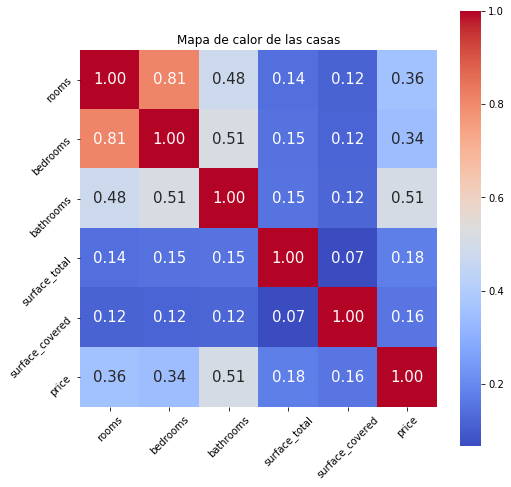

In [31]:
casaCORR=casa.corr()

def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
casa.corr(method=histogram_intersection)
plt.figure(figsize=(8,8))
sns.heatmap(casaCORR, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title("Mapa de calor de las casas")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Vemos en el mapa de calor las correlaciones de las variables, respecto una de otra. Y se puede observar que;
* A diferencia de los ph, el comportamiento de los cuartos y el precio, es similar al de los departamentos.
* Influye bastante más que en los departamentos la cantidad de metros cubiertos, pero es menor la suba del precio en relación a una casa

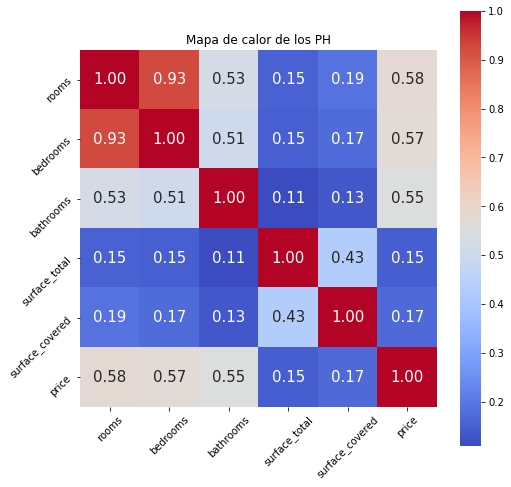

In [32]:
phCORR=ph.corr()

def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
ph.corr(method=histogram_intersection)
plt.figure(figsize=(8,8))
sns.heatmap(phCORR, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title("Mapa de calor de los PH")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

* Mapa de calor de todas las propiedades:

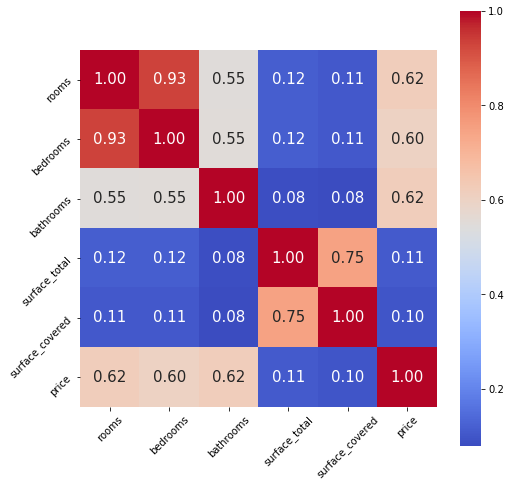

In [33]:
# ACA TENGO EL MAPA DE CALOR GENERAL
CORR=data_nuevo.corr()
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
data_nuevo.corr(method=histogram_intersection)
plt.figure(figsize=(8,8))
sns.heatmap(CORR, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


* Vamos a mostrar un gráfico con el promedio de superficie total por barrio

In [34]:
casaxbarrio
casaxbarrio1=casaxbarrio.assign(precioxsupcubierta=casaxbarrio.price/casaxbarrio.surface_covered)
casaxbarrio2=casaxbarrio1.assign(precioxsuptotal=casaxbarrio.price/casaxbarrio.surface_total)
casaxbarrio3 = casaxbarrio.sort_values('surface_total',ascending=False)
casaxbarrio3.drop(casaxbarrio3[casaxbarrio3.surface_covered>21919].index,inplace=True)
casaxbarrio4=casaxbarrio3.dropna()

In [35]:
casaxbarrio4

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3
8456,5.0,3.0,2.0,17444.0,150.0,435000.0,Belgrano
64973,4.0,3.0,2.0,14107.0,130.0,205000.0,Floresta
6572,3.0,2.0,1.0,13903.0,5913.0,198000.0,Mataderos
3125,4.0,3.0,2.0,13250.0,194.0,350000.0,Flores
1229,3.0,2.0,1.0,12521.0,53.0,270000.0,Belgrano
...,...,...,...,...,...,...,...
48635,3.0,1.0,1.0,11.0,60.0,158000.0,Palermo
109366,3.0,2.0,2.0,11.0,63.0,239000.0,Parque Centenario
57085,2.0,1.0,1.0,11.0,73.0,161900.0,Parque Chacabuco
73182,2.0,1.0,1.0,10.0,45.0,220000.0,Villa Lugano


No handles with labels found to put in legend.


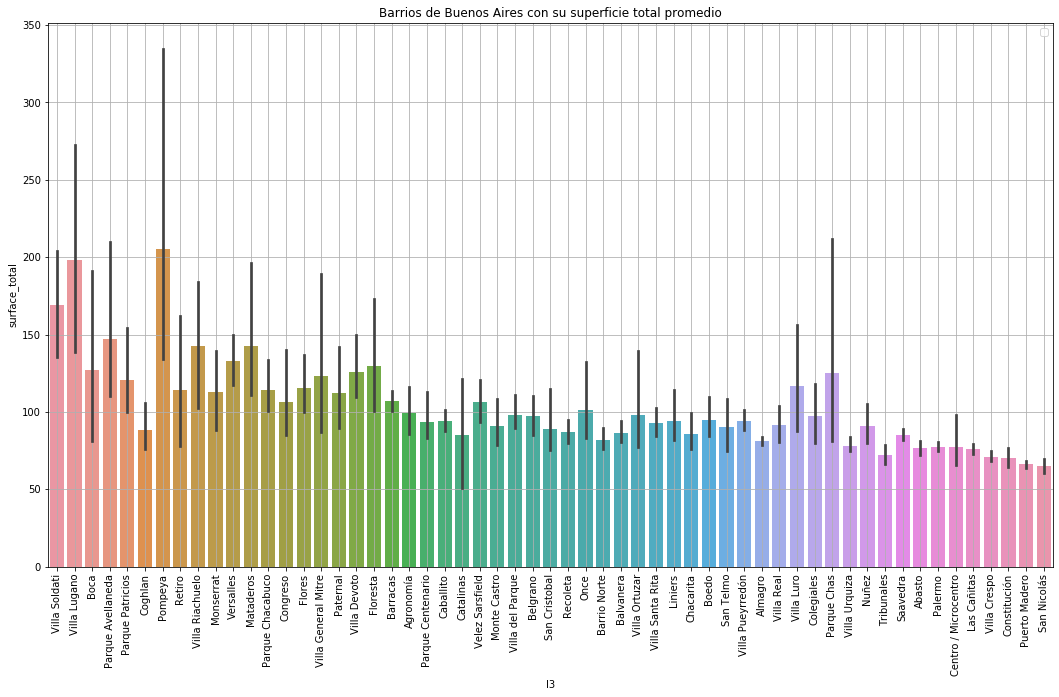

In [36]:
sup2=np.sum(casaxbarrio4["surface_total"])
#print(sup2,len(casaxbarrio4))
pd.value_counts(casaxbarrio4["l3"])
barrios = casaxbarrio4.groupby('l3').mean().sort_values('surface_covered', ascending=False).index
fig = plt.figure(figsize=(18,10))
sns.barplot(x="l3", y="surface_total",order=barrios, data= casaxbarrio4)
plt.legend()
plt.title("Barrios de Buenos Aires con su superficie total promedio")
plt.xticks(rotation = 90)
#plt.yticks(rotation = 90)
plt.grid()

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [37]:
dataML=pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
data_nuevoML = (dataML.price <= 4000000 )&(dataML.property_type =='Departamento')|(dataML.price <= 4000000)&(dataML.property_type=='PH')| (dataML.price <= 4000000)&(dataML.property_type =='Casa')           
dataML= dataML[data_nuevoML]
Prop_men1000=(dataML.surface_total<=1000)
dataML=dataML[Prop_men1000]
Prop_may15=(dataML.surface_total>=15)
dataML=dataML[Prop_may15]
tipo= (dataML.l2 == "Capital Federal")&(dataML.property_type =='Departamento')|(dataML.l2 == "Capital Federal")&(dataML.property_type=='PH')| (dataML.l2 == "Capital Federal")&(dataML.property_type =='Casa')           
dataML=dataML[tipo]
dataML=pd.DataFrame(dataML,columns=['rooms','bedrooms','bathrooms','surface_total','surface_covered','price'])
dataML=dataML.dropna(how='any',axis=0)
print("Checkpoint: ",dataML.shape)
print("Vemos que no hay ningún valor faltante",dataML.isnull().sum())

Checkpoint:  (81019, 6)
Vemos que no hay ningún valor faltante rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64


In [38]:
dataML.head(1)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0


* Se elige el error medio cuadrático como método de comparación con respecto al precio...

In [39]:
#Ver si borrar la libreria de regresion lineal, ya que no se si la voy a usar
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

* Se elige la métrica de precio. Y para ello, lo que vamos a hacer es separarla del dataset y generar otro dataset, para entrenarla

In [40]:
from sklearn.model_selection import train_test_split
X = dataML.drop(['price'], axis=1)
y = dataML['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

## Benchmark

* Evalúo el benchmark

In [41]:
med=dataML.price.mean()
predicho=[med]*len(y)
print("Un modelo constante que siempre predice el valor esperado de y, sin tener en cuenta las características de entrada, obtendría una puntuación R ^ 2 de 0.0.")
print("El valor de la metrica r2 es: ",r2_score(y,predicho))

Un modelo constante que siempre predice el valor esperado de y, sin tener en cuenta las características de entrada, obtendría una puntuación R ^ 2 de 0.0.
El valor de la metrica r2 es:  0.0


In [42]:
metrostotales=dataML["surface_total"]
y1=y.to_list()
y2=metrostotales.to_list()

In [43]:
from math import sqrt
#valores=[4,2,1,7,2,0,5,4,3,5,2,4,4,1,1,2,4,1,5,4,3,2,3,4,4,6,5,5,2,2,3,4,4,4,2,6,2,5,6,4,1,2,0,4,5,3,1,3,5,4,2,3,3,5,5,9,4,5,4,3]
#desviacion estandar: (((x1-media)**2)+...+((xn-media)**2))/n
media=sum(y1)/len(y1)
promediometros=sum(y2)/len(y2)
print ("El promedio de valores del precio es: ",media)
#lo que hago acá es crear una lista nueva, calculando la diferencia
#de cada valor con respecto a la media
argumento=[]
for i in (y1):
    valor=i-media
    argumento.append(valor)
#Luego aca a esos desvios de cada valor les calculo el cuadrado,
# para dejarlos postivimante orientados
#creo otra lista
cuadrados=[]
for j in argumento:
    x=j**2
    cuadrados.append(x)
#print ("Raices:  \n",raices)
desviacion=sqrt((sum(cuadrados))/(len(y1)-1))
print("Desvío entre los precios de cada casa es: ", desviacion)
varianza=((sum(cuadrados))/(len(y1)))
print("La varianza entre los precios es: ",varianza)
print("El promedio de los metros cuadrados totales es: ",promediometros)

El promedio de valores del precio es:  263772.52554339106
Desvío entre los precios de cada casa es:  298949.85665624373
La varianza entre los precios es:  89369913707.65114
El promedio de los metros cuadrados totales es:  95.36177933571138


In [44]:
print("Vemos que la varianza del codigo anterior nos da lo mismo que con sklearn: ",mean_squared_error(y, predicho))

Vemos que la varianza del codigo anterior nos da lo mismo que con sklearn:  89369913707.6502


## K-Nearest Neighbors (KNN)

In [45]:
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

In [46]:
print(lista_accuracy_train)
print(lista_accuracy_test)

[0.40343483857316664, 0.3497081797824132, 0.3277202757745138, 0.3192213425493273, 0.3088357166787156, 0.3013594766631989, 0.2919083807945268, 0.2853666707809497, 0.27841941001181386, 0.27371149471902384, 0.2505245710859944, 0.23289192953996438, 0.22206548763070197, 0.21072769911660466, 0.20328672438418, 0.1960044434256696, 0.18544249113959763]
[0.21620176088208673, 0.19879865053896156, 0.18962396116185304, 0.19307989796758002, 0.193573603225541, 0.1967415452974574, 0.19353246112071093, 0.1950958611042541, 0.19307989796758002, 0.19283304533859952, 0.18785485065415947, 0.18065498230889493, 0.17625277709207604, 0.17073973504484488, 0.16592610877972516, 0.1621821772401876, 0.15576400888669464]


* A partir de estos datos obtenidos de los porcentajes de exactitud, vemos como va cayendo a medida que k aumenta, osea, a mas vecinos, peor accuracy

In [47]:
clf_knn = KNeighborsClassifier(n_neighbors =k )
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [48]:
y_train_pred = clf_knn.predict(X_train)
y_test_pred = clf_knn.predict(X_test)

In [49]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
# Esto de aca nos devuelve el porcentaje de aciertos para el ultimo k,
# osea que no es EL porcentaje de aciertos del algoritmo
print('Porcentaje de aciertos sobre el set de entrenamiento:', train_acc)
print('Porcentaje de aciertos sobre el set de evaluación:',test_acc)

Porcentaje de aciertos sobre el set de entrenamiento: 0.18544249113959763
Porcentaje de aciertos sobre el set de evaluación: 0.15576400888669464


* Creamos un gráfico para visualizar la precisión evaluada en cada caso de vecinos cercanos previamente planeteada

Text(0, 0.5, 'Exactitud')

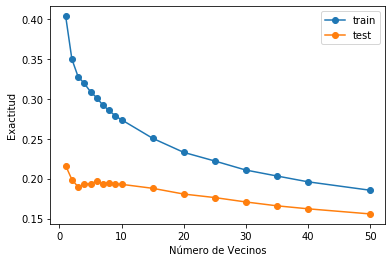

In [50]:
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('Exactitud')

# Árboles de decisión 

In [51]:
clasif_DT = DecisionTreeClassifier(random_state = 42)
#Entrenamos el modelo
clasif_DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [52]:
from sklearn.tree import DecisionTreeRegressor
y_pred  = clasif_DT.predict(X_test)
clf_tree = DecisionTreeRegressor()

In [53]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train2 = []
lista_accuracy_test2 = []


# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeClassifier(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train2.append(train_acc)
    lista_accuracy_test2.append(test_acc)

In [54]:
print(lista_accuracy_train2)
print(lista_accuracy_test2)

[0.021494190044610582, 0.027877206284273447, 0.03228536667078095, 0.03868601555198985, 0.04443425669599563, 0.052862659354997975, 0.06541710013577134, 0.07977007035423977, 0.09823144605293319, 0.12041330911783894, 0.25154726429566415, 0.37088498227919525, 0.44361962865656906, 0.4720258141872234, 0.47817960608678783, 0.47886727910708304, 0.47888491174862907]
[0.022052168188924547, 0.028717189171398008, 0.03353081543651773, 0.03863243643544804, 0.04459804163581009, 0.05183905208590472, 0.06220686250308566, 0.07315066238788777, 0.08705669382045586, 0.1012918620916646, 0.18110754546202584, 0.23286431333827037, 0.25730272360733975, 0.26771167612935076, 0.26997449189500533, 0.2705504813626265, 0.2705093392577964]


Text(0, 0.5, 'Exactitud')

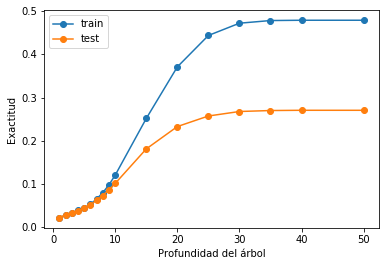

In [55]:
plt.plot(max_depths,lista_accuracy_train2,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test2,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')

# Regresión lineal

* Este modelo lo hice como tercer planteo para ver que tan distinto me daban los resultados. Y en el gráfico me da una distribución poco amigable para manipular los datos. Con respecto a su exactitud, analizandolá en terminos generales, me parece bastante pobre. Sería mucho mejor si la divido por zonas y por tipología de departamento. Para ver el funcionamiento de este algoritmo fué probar, ingresando el precio y que me devuelva la superficie total y la verdad es que de la forma en que lo hice, no devuelve resultados certeros, pero podría mejorarse, si de entrada se encara el dataset para este lado.
* También probé la regresión logística, pero me demoraba muchísimo tiempo a la hora de ejecutarlo, nunca pude visualizar un resultado de la misma. No sé porque se hace tan pesado

In [56]:
lineal = LinearRegression()
#Entrenamos el modelo
lineal.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_pred  = lineal.predict(X_test)

In [58]:
dataML.surface_total.mean()

95.36177933571138

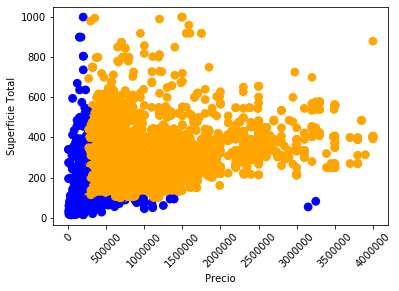

In [59]:
# Vamos a RECORTAR los datos en la zona donde se divide por la mediaos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = dataML[(dataML['price'] <= 4000000) & (dataML['surface_total'] <=1000)]

colores=['orange','blue']
tamanios=[60,60]

f1 = filtered_data['price'].values
f2 = filtered_data['surface_total'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['price']>=263772)and (row["surface_total"]>=95):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.xticks(rotation = 45)
plt.xlabel("Precio")
plt.ylabel("Superficie Total")
plt.show()

In [60]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["price"]]
X_train = np.array(dataX)
y_train = filtered_data['surface_total'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.00017739]
Independent term: 
 48.57053579794972
Mean squared error: 3155.74
Variance score: 0.47


In [61]:
#Vamos a comprobar:
# Quiero predecir cuántos "surface_covered" voy a obtener para un "price" de 40.000 dólares,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[300000]])
print("Metros cuadrados: ",int(y_Dosmil))
#esta prediccion es bastante mala

Metros cuadrados:  101


## Conclusión

* A partir del gráfico vemos como a medida que las divisiones o profundidad del árbol son mayores, la exactitud del modelo es mayor.
* Pero al mismo tiempo vemos como se aleja el x_train del x_test. Que significa esto?, significa que la predicción que estamos haciendo de nuestro modelo no va a ser tan acertada de la realidad, entonces, lo que tenemos que buscar es que, la distancia entre el x_test y el x_train no sea grande y al mismo tiempo tenemos que tratar de usar una profundidad del árbol en la que nos devuelva una buena exactitud en el modelo y que no nos genera un overfitting.
* Por eso, en este caso, yo eligiría la profundidad= 15.
* Como punto de partida ambos modelos son buenos predictores, pero elegiría el modelo de árboles de decisión, ya que me parece lo más familiar. Además en este dataset ha funcionado mejor el algoritmo de arboles de decisión.
* En estos dos casos los features que usé fueron superficie total y precio. Osea que el resto puede sacarse, pero en realidad si queremos hacer un análisis más profundo o algún tipo de gráfico tridimensional, no estarían de más agregarlos.
* Lo que sí me pareció que no daba mucha información eran los dormitorios, ya que en la variable rooms puede incluirse, y previamente como analizamos, la correlación que había entre rooms y el resto de las variables y bedrooms con el resto de las variables, era bastante parecida...